## Exploratory Data Analysis

In [92]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [93]:
df = pd.read_csv('./AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Data Inspection

In [94]:
# Checking for Null Values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [95]:
# Checking for Duplicate Rows
df['Date'].duplicated().sum()

0

In [96]:
# Statistical Description
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [97]:
# Checking for Rows Data Types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Data Cleaning

In [98]:
# Converting Data Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [99]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [100]:
# Setting Datetime as Index
dt= df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Visualizations

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Close Price')

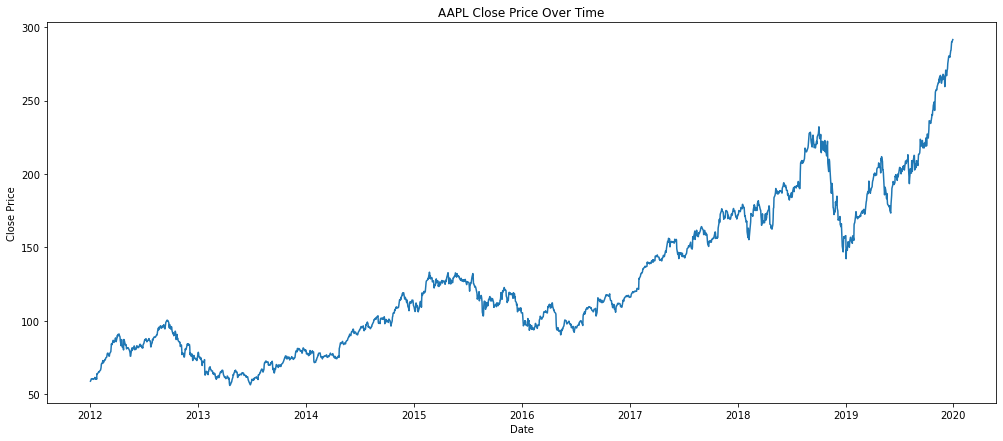

In [102]:
# Line Plot for Stock Prices based on Closing Price

plt.figure(figsize=(17,7))
plt.plot(dt.index, dt['Close'])
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')


Stock has shown a gradual increase in the assest value over time.

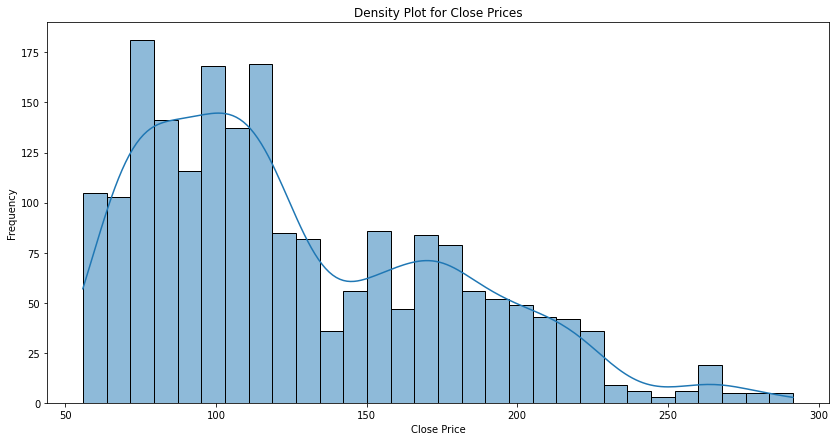

In [103]:
# Density Plots
plt.figure(figsize=(14,7))
sns.histplot(dt['Close'], kde=True, bins=30)
plt.title('Density Plot for Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

#### Observations for Density Plot

* The most common closing prices are in the 90 to 110 range.
* The distribution is right-skewed with a long tail towards higher prices.
* There are two primary peaks indicating frequent price ranges.
* There is significant variability in the closing prices over the time period.

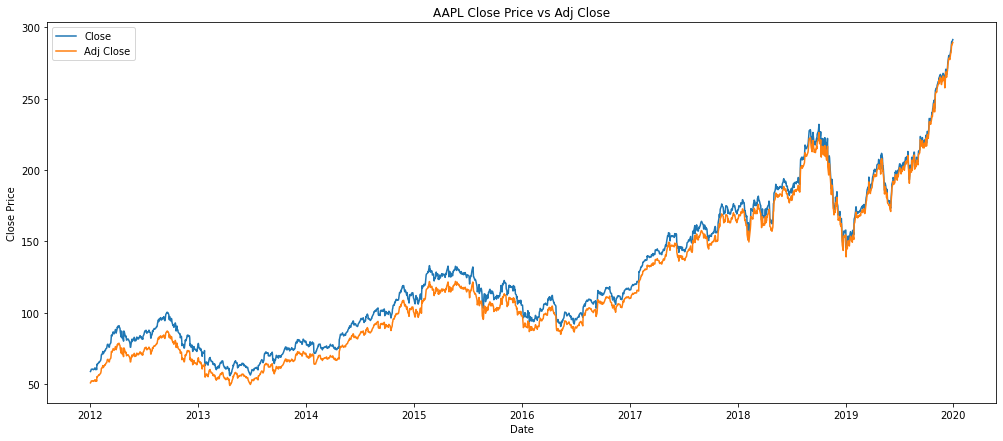

In [104]:
# Line Plot for Stock Prices (Closing Price vs Adjusted Close)

plt.figure(figsize=(17,7))
plt.plot(dt.index, dt['Close'], label = 'Close')
plt.plot(dt.index, dt['Adj Close'], label = 'Adj Close')
plt.title('AAPL Close Price vs Adj Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#### Observations for Adjusted Close Prices
Adjusted Close Price represents the closing price of a stock that has been adjusted for all applicable splits and dividend distributions. This adjustment provides a more accurate representation of the stock's value over time.

* Importance of Adjustments when these is a Stock Split:

    When a compnay performs a stock split, the number of shares increases, but the price per share decreases proportionally. The Adjusted Close price accounts for these changes, allowing for a consistent comparision over time.

* Importance of Adjustments when Dividends are issued:

    Cash dividends paid by the company are also factored into the Adjusted Close price. This adjustment reflects the drop in stock price when dividends are paid, providing a true reflection of the investor's return.

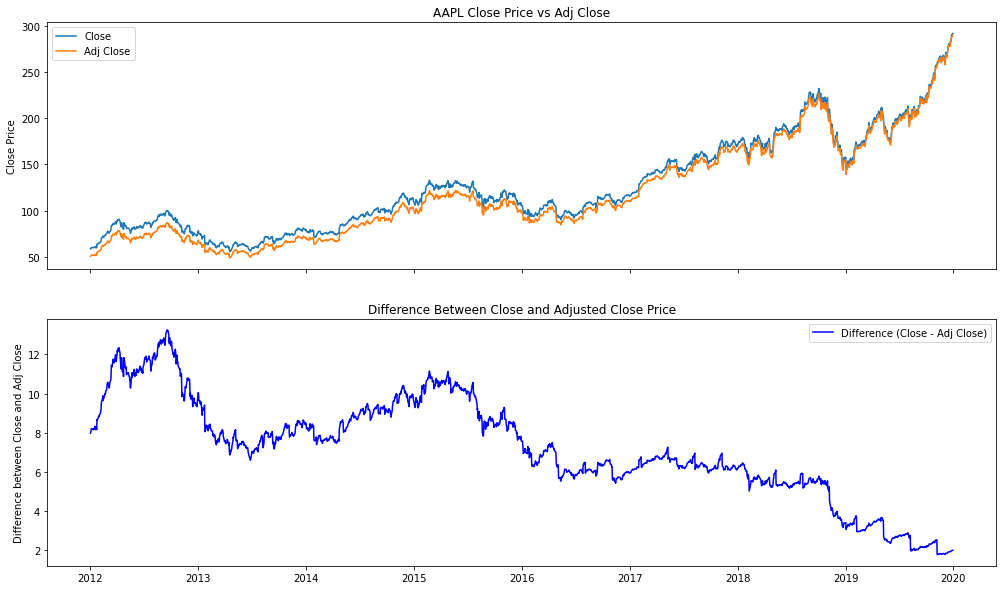

In [105]:
# Plot the difference and ratio
dt['Difference'] = dt['Close'] - dt['Adj Close']
 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 10), sharex=True)

# Plot for Close Price and Adj Close Price
ax1.plot(dt.index, dt['Close'], label = 'Close')
ax1.plot(dt.index, dt['Adj Close'], label = 'Adj Close')
ax1.set_title('AAPL Close Price vs Adj Close')
ax1.set_ylabel('Close Price')
ax1.legend()

# Plot the difference
ax2.plot(dt.index, dt['Difference'], label='Difference (Close - Adj Close)', color='blue')
ax2.set_title('Difference Between Close and Adjusted Close Price')
ax2.set_ylabel('Difference between Close and Adj Close')
ax2.legend()
plt.show()

#### Differences between Close and Adjusted Close

* The differneces vary over time, showing larger gaps during specific periods. These periods typically correspond to major corporate actions like stock splits or significant dividend payments. For Instance, the difference is higher around 2012-2013, which might correspond to a stock split or significant dividend distributions during that time.

* There is a noticeable trend where the difference decreases over time, especially from 2017 onwards. This could indicate fewer major corporate actions impacting the stock price in the latter years compared to earlier years.

* After significant events, the difference stabilizes for periods before showing another spike, reflecting the consistency in how corporate actions impact the stock price.

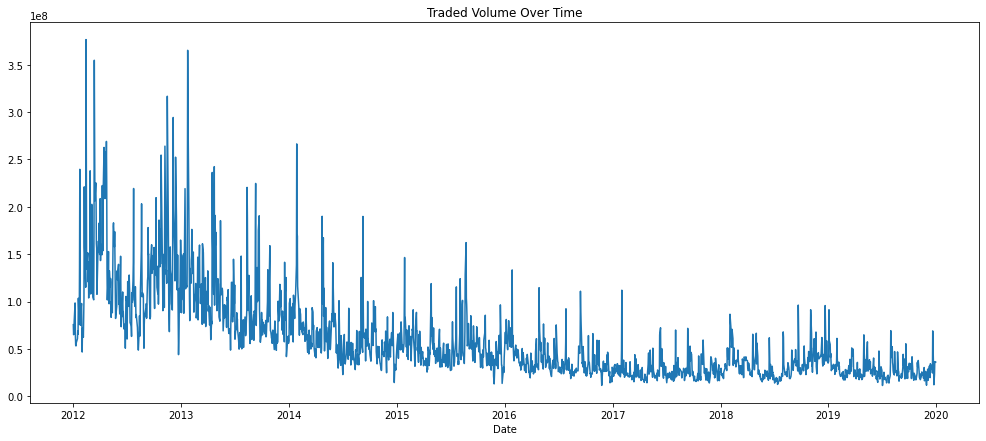

In [106]:
# Volumne Traded Over Time
plt.figure(figsize=(17,7))
plt.plot(dt.index, dt.Volume)
plt.title('Traded Volume Over Time')
plt.xlabel('Date')
plt.show()

#### Observations for Volume

* The early period (2012 - 2014) had high trading volumes and significant price adjustments, indicating a volatile period with frequent corporate actions.

* Post - 2014, the trading volume shows a decreasing trend, and the differences between Close and Adjusted Close price also stabilize, indicating fewer significant corporate actions.

* Periodic spikes in trading volume correspond to significant events affecting stock prices, which align with the significant adjustments observed in the difference plot.

#### Observations for Decomposition Plots

In [107]:
# Decomposing the time series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dt['Close'], model='additive', period=365)

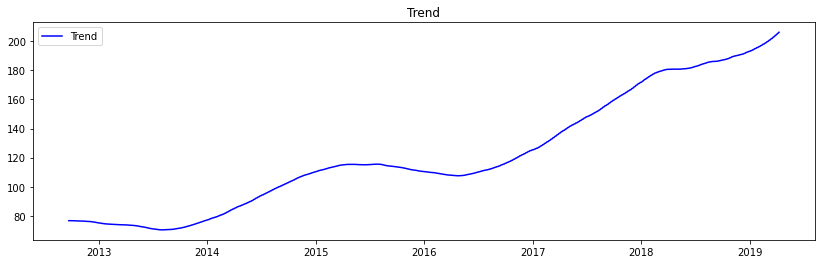

In [108]:
# Plotting Trend
plt.figure(figsize=(14,4))
plt.plot(result.trend, label='Trend', color='blue')
plt.title('Trend')
plt.legend()
plt.show()

##### 1. Trend:

* The trend component captures the long-term progression of the series. It shows the general direction in which the data is moving over a long period, ignoring short-term fluctuations and noise.

* The trend line is generally upward from 2012 to 2020, indicating a consistent long-term increase in the AAPL stock price. There are periods of acceleration, especially from 2017 onward, where the stock price increases at a faster rate.

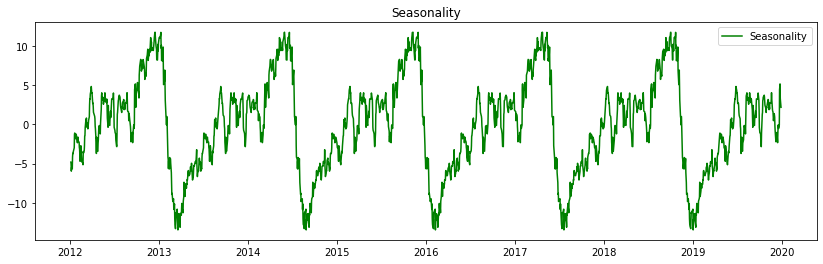

In [109]:
# Plotting Seasonal Component
plt.figure(figsize=(14,4))
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()
plt.show()

##### 2. Seasonality:

* Seasonality refers to the repeated patterns or cycles observed at regular intervals due to seasonal factors. This component is consistent and predictable over the time period.

* The seasonal component shows a regular, recurring pattern on an annual basis. There are noticeable peaks and troughs each year, indicating that certain times of the year consistently experience higher or lower prices. This pattern repeats roughly every year, showing the impact of seasonal factors on the stock price.

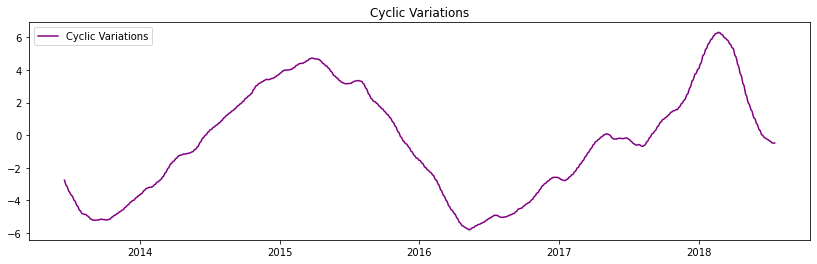

In [110]:
# Plotting Cyclic Component
cyclic = result.trend - result.trend.rolling(window = 365, center= True).mean()
plt.figure(figsize=(14,4))
plt.plot(cyclic, label='Cyclic Variations', color='purple')
plt.title('Cyclic Variations')
plt.legend()
plt.show()

##### 3. Cyclic Variations:

* Cyclic Variations capture fluctuations that occur at irregular intervals, often influenced by economic cycles, market conditions, or other external factors. Unlike seasonality, cyclic variations do not have a fixed period.

* The cyclic component shows longer-term fluctuations that are not as regular as seasonal effects. For instance, there is a noticeable cyclic peak around 2018 and a trough around 2015, indicating periods of economic or market cycles affecting the stock price.

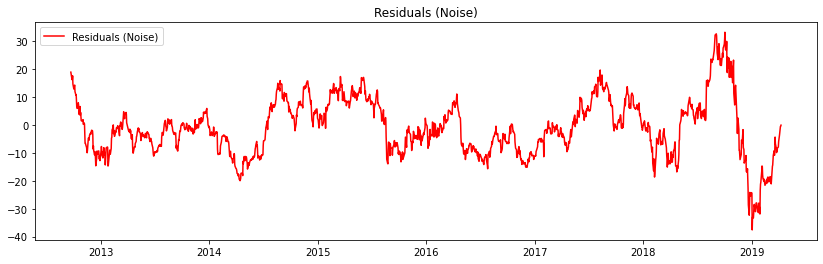

In [111]:
# Plotting Residuals
plt.figure(figsize=(14,4))
plt.plot(result.resid, label='Residuals (Noise)', color='red')
plt.title('Residuals (Noise)')
plt.legend()
plt.show()

##### 4. Residuals/Noise:

* The residual component captures the remaining variability in the data after removing the trend, seasonal, and cyclic components. It represents the irregular, random fluctuations in the series.

* The residuals show high-frequency variability that does not follow any predictable pattern. Periods with larger residuals indicate times of higher volatility or unexpected events impacting the stock price. For example, there is significant noise in the data around 2018 and again towards the end of 2019.

<Figure size 864x432 with 0 Axes>

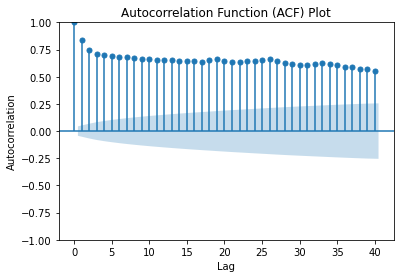

In [112]:
# Seasonality using Auto Correlation
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plot_acf(dt['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

#### Observation for Seasonality using Autocorrelation

* Peaks at regular intervals in the ACF plot suggest the presence of seasonality.

* As there are no visible spikes at regular intervals, there is no seasonality in the data.

## Data Preprocessing

In [113]:
dt.drop(columns=['Difference'], inplace=True)

In [114]:
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


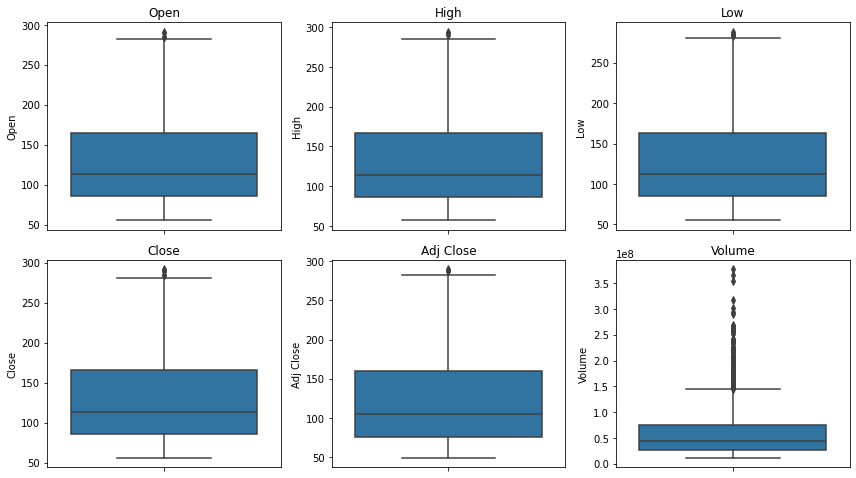

In [115]:
# Checking for outliers

plt.figure(figsize=(12, 10))
for i, col in enumerate(dt.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=dt[col])
    plt.title(col)
plt.tight_layout()
plt.show()

There seems to be genuine outliers in every column. Therefore, we will choose to ignore them.

But, that is not the case with Volume there is significant number of outliers in Volume column which might the result of seasonality and various corporate actions.

Therefore, we will check and remove outliers in the Volume column using z_scores in this case, as using IQR would not give any clear judgement.

Since, we will be forecasting Closing Prices of the Stock, we will also check for outliers in the Close column using z_scores as well.

In [116]:
# Handling outliers in Close Prices using z-scores

from scipy import stats

z_scores = stats.zscore(dt['Close'])
absolute_zscores = abs(z_scores)
filtered_data = (absolute_zscores < 3)
dt = dt[filtered_data]
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-09,270.000000,270.799988,264.910004,266.920013,265.091156,32010600
2019-12-10,268.600006,270.070007,265.859985,268.480011,266.640503,22605100
2019-12-11,268.809998,271.100006,268.500000,270.769989,268.914795,19689200
2019-12-12,267.779999,272.559998,267.320007,271.459991,269.600067,34327600


In [117]:
# Handling Outliers in Volume using z_scores
z_scores = stats.zscore(dt['Volume'])
absolute_zscores = abs(z_scores)
filtered_data = (absolute_zscores < 3)
dt = dt[filtered_data]
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-09,270.000000,270.799988,264.910004,266.920013,265.091156,32010600
2019-12-10,268.600006,270.070007,265.859985,268.480011,266.640503,22605100
2019-12-11,268.809998,271.100006,268.500000,270.769989,268.914795,19689200
2019-12-12,267.779999,272.559998,267.320007,271.459991,269.600067,34327600


In [118]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler

# Initializing standard scaler
scaler = StandardScaler()

# Applying Standard Scaler to only necessary features
scaled_data = scaler.fit_transform(dt[['Close']])
scaled_df = pd.DataFrame(scaled_data, columns=['Close'])
scaled_df.index = dt.index
scaled_df

,Close
2012-01-03,-1.380233
2012-01-04,-1.373850
2012-01-05,-1.360591
2012-01-06,-1.347968
2012-01-09,-1.349904
...,...
2019-12-09,2.828983
2019-12-10,2.860526
2019-12-11,2.906829
2019-12-12,2.920781


Standardizing data ensures that the data is on consistent scale, improving the performance and reliability of various algorithms, enhancing interpretability, and preventing numerical issues.

## Model Building

### ARIMA

An ARIMA model is characterized by 3 terms (p, d, q):

* p is the order of the AR term. It refers to the number of lags to be used as predictors.
* d is the number of differencing required to make the time series stationary
* q is the order of the MA term. It refers to the number of lagged forecast errors that should go into the ARIMA model.

As seen per the parameters required by the model, any stationary time series can be modeled with ARIMA models.
Therefore we have to check if our dataset have stationarity or not.

#### Stationarity

Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times.

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.

##### ADF test

We will use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

Hypothesis Test:

Null Hypothesis: Time series is non-stationary.\
Alternative Hypothesis: Time series is Stationary.

So, if the p-value of the test is less than the significance level of 0.05,
then we can reject the null hypothesis and infer that the time series is indeed stationary.

In [119]:
# Hypothesis Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(scaled_df)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("\nAccept Null Hypothesis: Data is non-stationary")
else:
    print("\nReject Null Hypothesis: Data is stationary")

ADF Statistic: 0.7565815588791918
p-value: 0.9909019811657861

Accept Null Hypothesis: Data is non-stationary


So, in our case, te p-value is > 0.05,
we will need to find the order of differencing.

In [120]:
# Getting order of differencing
from pmdarima.arima.utils import ndiffs

print('Differencing (d) =',ndiffs(scaled_df, test='adf'))

Differencing (d) = 1


##### p
p is the order of the AR term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial auto correlation represents the correlation between the series and its lags.

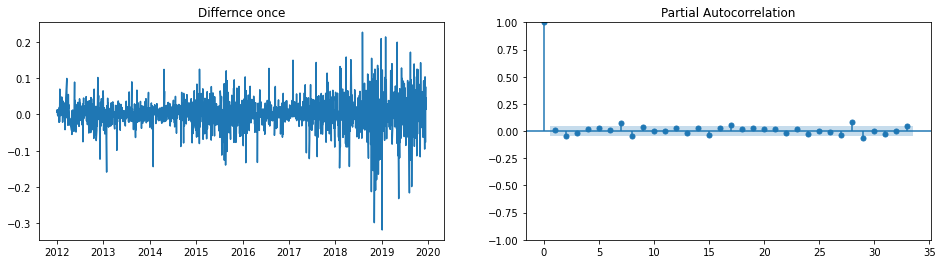

In [121]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = scaled_df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Differnce once')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

We can observe that the PACF lag (p) 7 is significant as it is above the significance line.

##### q
q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA model.

We can look at the ACF plot for the number of MA terms.

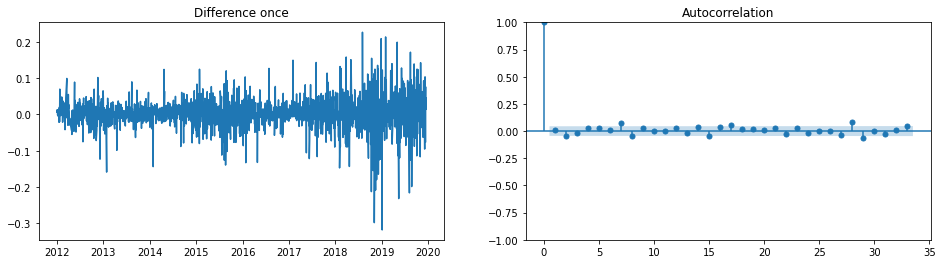

In [122]:
diff = scaled_df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

The ACF lag (q) 2 is significant as it is just at the significance line.

So, we will choose 2 as the q value.

#### Fitting the ARIMA

In [123]:
# Splitting the dataset

train = scaled_df.loc[:'2019-01-01']
test = scaled_df.loc['2019-01-02':]

In [124]:
# Building model
import pmdarima as pm

arima_model = pm.auto_arima(
    train,
    seasonal = False,
    trace = True,
    error_action = 'ignore',
    suppress_warnings = True
)

arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6271.086, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6272.468, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6272.247, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6272.380, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6272.923, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6273.092, Time=0.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6269.811, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6269.675, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6272.278, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6272.473, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6271.543, Time=0.16 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.681 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1717
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3140.546
Date:                Tue, 18 Jun 2024   AIC                          -6273.092
Time:                        12:58:06   BIC                          -6251.301
Sample:                             0   HQIC                         -6265.029
                               - 1717                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0021      0.002      1.205      0.228      -0.001       0.006
ar.L1         -0.8238      0.097     -8.453      0.000      -1.015      -0.633
ma.L1          0.8533      0.089      9.557      0.000       0.678       1.028
sigma2         0.0015   2.59e-05     58.151      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2952.70
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
# Making predictions with ARIMA

n_periods = len(test)

arima_predictions, arima_conf_int = arima_model.predict(
    n_periods = n_periods,
    return_conf_int = True
)

arima_pred_df = pd.DataFrame({
    'Predictions' : arima_predictions
})
arima_pred_df.index = test.index

arima_conf_int_df = pd.DataFrame(
    arima_conf_int,
    index = test.index,
    columns = ['Lower', 'Upper']
)

In [126]:
# Evaluating ARIMA model
from sklearn.metrics import mean_absolute_error, mean_squared_error

arima_mae = mean_absolute_error(test, arima_predictions)
arima_mse = mean_squared_error(test, arima_predictions)

print(f'ARIMA Model - Mean Absolute Error (MAE): {arima_mae}')
print(f'ARIMA Model - Mean Squared Error (MSE): {arima_mse}')

ARIMA Model - Mean Absolute Error (MAE): 0.8283758254106385
ARIMA Model - Mean Squared Error (MSE): 0.9639731696952298


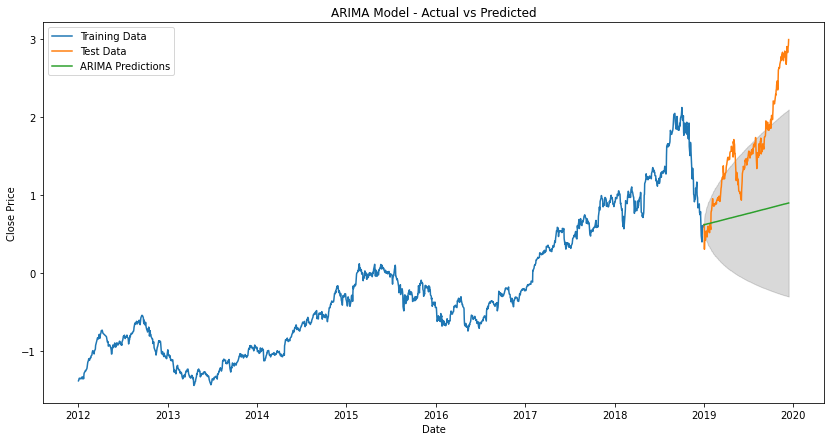

In [127]:
# Plot the actual vs predicted values for ARIMA
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(arima_pred_df, label='ARIMA Predictions')
plt.fill_between(arima_conf_int_df.index, arima_conf_int_df['Lower'], arima_conf_int_df['Upper'], color='k', alpha=.15)
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#### Fitting the SARIMA




In [128]:
# Building the SARIMA model

sarima_model = pm.auto_arima(
    train,
    seasonal = True,
    m = 12,
    trace = True,
    error_action = 'ignore',
    suppress_warnings = True
)

sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-6267.231, Time=4.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-6272.468, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-6270.297, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-6270.441, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-6272.923, Time=0.22 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-6270.521, Time=0.33 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-6270.529, Time=0.27 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-6268.619, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-6272.247, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-6272.380, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-6273.092, Time=0.95 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-6269.054, Time=0.83 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-6269.062, Time=1.83 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-6267.169, Time=1.12 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1717
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3140.546
Date:                Tue, 18 Jun 2024   AIC                          -6273.092
Time:                        12:58:22   BIC                          -6251.301
Sample:                             0   HQIC                         -6265.029
                               - 1717                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0021      0.002      1.205      0.228      -0.001       0.006
ar.L1         -0.8238      0.097     -8.453      0.000      -1.015      -0.633
ma.L1          0.8533      0.089      9.557      0.000       0.678       1.028
sigma2         0.0015   2.59e-05     58.151      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2952.70
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
# Making prediction using SARIMA
sarima_predictions, sarima_conf_int = sarima_model.predict(
    n_periods = n_periods,
    return_conf_int = True
)

sarima_pred_df = pd.DataFrame({
    'Predictions' : sarima_predictions
})
sarima_pred_df.index = test.index

sarima_conf_int_df = pd.DataFrame(
    sarima_conf_int,
    index = test.index,
    columns = ['Lower', 'Upper']
)

In [130]:
# Evaluating SARIMA model
sarima_mae = mean_absolute_error(test, sarima_predictions)
sarima_mse = mean_squared_error(test, sarima_predictions)
print(f'SARIMA Model - Mean Absolute Error (MAE): {sarima_mae}')
print(f'SARIMA Model - Mean Squared Error (MSE): {sarima_mse}')

SARIMA Model - Mean Absolute Error (MAE): 0.8283758254106385
SARIMA Model - Mean Squared Error (MSE): 0.9639731696952298


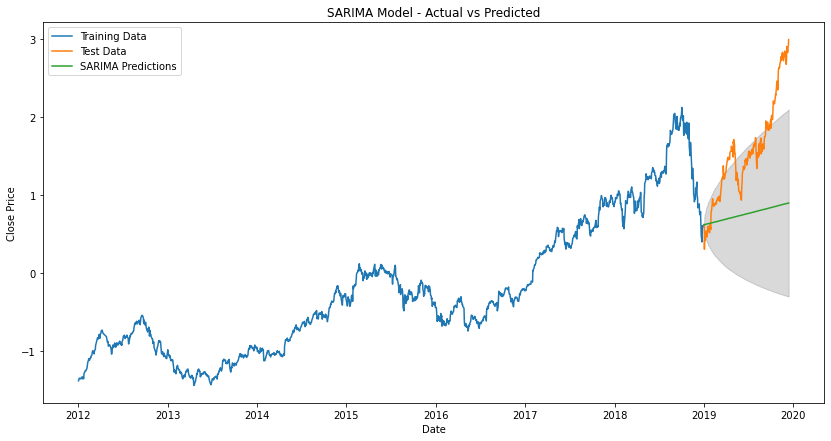

In [131]:
# Plot the actual vs predicted values for SARIMA
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(sarima_pred_df, label='SARIMA Predictions')
plt.fill_between(sarima_conf_int_df.index, sarima_conf_int_df['Lower'], sarima_conf_int_df['Upper'], color='k', alpha=.15)
plt.title('SARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### LSTM

LSTMs are a type of recurrent neural network (RNN) that are well-suited for capturing temporal dependencies in sequential data.

In [132]:
data = dt['Close'].values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler

# Using MixMaxScaler to scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [133]:
# Function to create dataset with look_back
import numpy as np

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i: (i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])

    return np.array(X), np.array(Y)

In [134]:
# Setting the look_back period
look_back = 60

# Creating Dataset
train_size = int(len(scaled_data) * 0.80) # 80% split

train, test = scaled_data[:train_size], scaled_data[train_size:] # train is 80% and test is 20%

trainX, trainY = create_dataset(train, look_back)

testX, testY = create_dataset(test, look_back)

# Reshaping input to be [samples, time steps, feature]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [135]:
# Building LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(trainX, trainY, batch_size=1, epochs=2)

Epoch 1/2
1505/1505 [==============================] - 15s 9ms/step - loss: 9.3083e-04
Epoch 2/2
1505/1505 [==============================] - 13s 8ms/step - loss: 3.6707e-04


In [136]:
# Making Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculating root mean squared error
trainScore = np.sqrt(np.mean(
    (trainPredict[:,0] - trainY[0]) ** 2
))

testScore = np.sqrt(np.mean(
    (testPredict[:, 0] - testY[0])**2
))

print(f'Train Score: {trainScore} RMSE')
print(f'Test Score: {testScore} RMSE')

11/11 [==============================] - 0s 4ms/step
Train Score: 2.5440737891029293 RMSE
Test Score: 6.212606850354907 RMSE


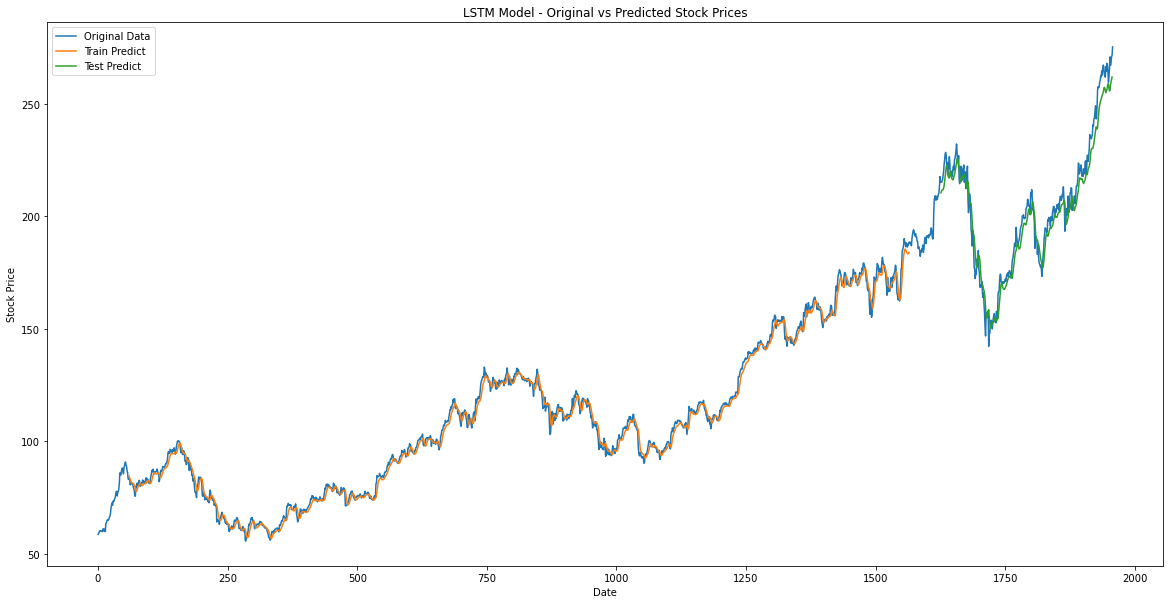

In [137]:
# Restructing shape of the array for plotting

# Shifting train predictions for plotting
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shifting test predicitons for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2) + 1 : len(scaled_data) - 1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('LSTM Model - Original vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [138]:
# Define function to forecast next n days
def forecast_next_days(model, data, n_days, look_back):
    forecast = []
    last_sequence = data[-look_back:]
    current_sequence = np.reshape(last_sequence, (1, look_back, 1))

    for _ in range(n_days):
        next_value = model.predict(current_sequence)
        forecast.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

    return np.array(forecast)

1/1 [==============================] - 0s 21ms/step


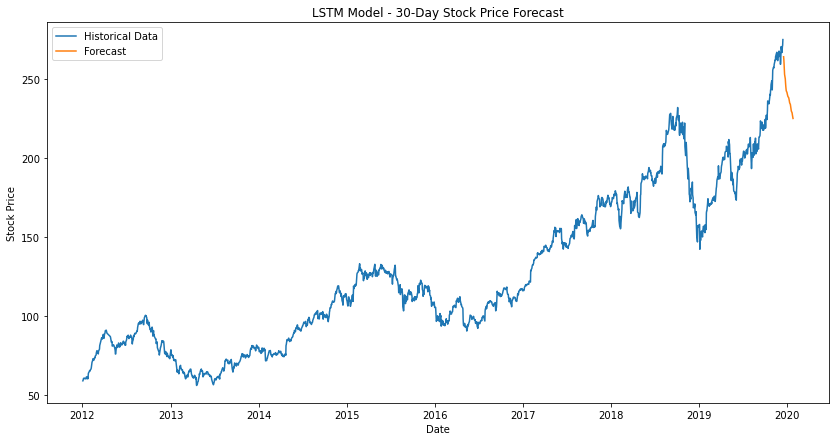

In [139]:
# Number of days to forecast
n_days = 30

# Getting the last look_back days from the dataset
last_sequence = scaled_data[-look_back:]

# Forecasting next 30 days
forecasted_values = forecast_next_days(model, scaled_data, n_days, look_back)

# Invertint the scaled predictions back to the original scale
forecasted_values = scaler.inverse_transform(forecasted_values.reshape(-1,1))

# Creating a Dataframe for plotting
forecast_dates = pd.date_range(
    start=dt.index[-1] + pd.Timedelta(days=1),
    periods=n_days,
    freq='B'
)

forecast_df = pd.DataFrame(
    forecasted_values,
    index=forecast_dates,
    columns=['Forecast']
)

# Plotting the results
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(dt['Close'], label='Historical Data')
plt.plot(forecast_df, label='Forecast')
plt.title('LSTM Model - 30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Hyperparameter Tuning

### ARIMA Hyperparamter Tuning

In [140]:
# Performing grid search for ARIMA

optimized_arima_model = pm.auto_arima(
    train,
    start_p=1,
    start_q=1,
    test='adf', # using adf test to find optimal 'd'
    max_p=5,
    max_q=5,
    m=1,
    start_P=0,
    seasonal=False,
    d=None,
    D=0,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

optimized_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10867.187, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10868.279, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10868.960, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10869.017, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10866.334, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10867.177, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10865.076, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10867.388, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.456 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1566
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5437.508
Date:                Tue, 18 Jun 2024   AIC                         -10869.017
Time:                        12:58:57   BIC                         -10852.950
Sample:                             0   HQIC                        -10863.044
                               - 1566                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.880      0.060   -1.57e-05       0.001
ma.L1          0.0419      0.019      2.174      0.030       0.004       0.080
sigma2      5.612e-05   1.19e-06     47.125      0.000    5.38e-05    5.84e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               876.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
arima_order = optimized_arima_model.order
print(f'Best ARIMA order (p,d,q): {arima_order}')

Best ARIMA order (p,d,q): (0, 1, 1)


### Building Model using Optimized ARIMA Model

In [142]:
# Splitting the dataset

train = scaled_df.loc[:'2019-01-01']
test = scaled_df.loc['2019-01-02':]

In [143]:
# Making predictions with ARIMA

n_periods = len(test)

arima_predictions, arima_conf_int = optimized_arima_model.predict(
    n_periods = n_periods,
    return_conf_int = True
)

arima_pred_df = pd.DataFrame({
    'Predictions' : arima_predictions
})
arima_pred_df.index = test.index

arima_conf_int_df = pd.DataFrame(
    arima_conf_int,
    index = test.index,
    columns = ['Lower', 'Upper']
)

In [144]:
arima_mae = mean_absolute_error(test, arima_predictions)
arima_mse = mean_squared_error(test, arima_predictions)

print(f'ARIMA Model - Mean Absolute Error (MAE): {arima_mae}')
print(f'ARIMA Model - Mean Squared Error (MSE): {arima_mse}')

ARIMA Model - Mean Absolute Error (MAE): 0.9371803764192755
ARIMA Model - Mean Squared Error (MSE): 1.217257594788775


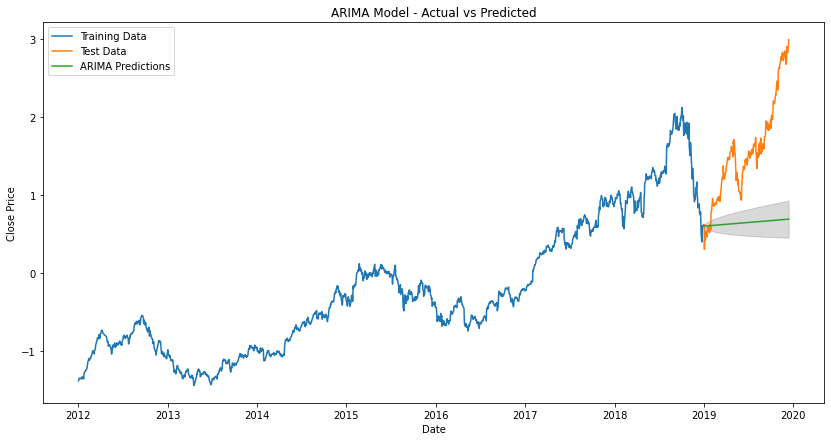

In [145]:
# Plot the actual vs predicted values for ARIMA
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(arima_pred_df, label='ARIMA Predictions')
plt.fill_between(arima_conf_int_df.index, arima_conf_int_df['Lower'], arima_conf_int_df['Upper'], color='k', alpha=.15)
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### SARIMA Hyperparameter Tuning

In [146]:
# Performing grid search for SARIMA

optimized_sarima_model = pm.auto_arima(
    train,
    start_p=1,
    start_q=1,
    test='adf', # adf test to find optimal 'd'
    max_p=5,
    max_q=5,
    m=12,
    start_P=0,
    seasonal=True,
    d=None,
    D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

optimized_sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=18.77 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-1910.367, Time=0.45 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-5526.761, Time=6.03 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-3478.705, Time=8.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1894.730, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-5145.443, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-5740.557, Time=13.56 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=20.90 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=17.00 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-1935.940, Time=3.54 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-5745.584, Time=19.87 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-5527.886, Time=8.69 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=26.53 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.76 sec
 ARIMA(3,0,0)(2,1,0)[12] int

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1717
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                2878.713
Date:                             Tue, 18 Jun 2024   AIC                          -5747.426
Time:                                     13:04:41   BIC                          -5720.219
Sample:                                          0   HQIC                         -5737.355
                                            - 1717                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9681      0.004    227.279      0.000       0.960       0.976
ma.L1          0.0688      0.017      3.957      0.000       0.035       0.103
ar.S.L12      -0.6347      0.018    -35.280      0.000      -0.670      -0.599
ar.S.L24      -0.3696      0.017    -22.073      0.000      -0.402      -0.337
sigma2         0.0020   3.42e-05     58.238      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3103.59
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.74   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
sarima_order = optimized_sarima_model.order
seasonal_order = optimized_sarima_model.seasonal_order

print(f'Best SARIMA order: {sarima_order}')
print(f'Best SARIMA seasonal order: {seasonal_order}')

Best SARIMA order: (1, 0, 1)
Best SARIMA seasonal order: (2, 1, 0, 12)


### Building Model using Optimized SARIMA Model

In [148]:
# Making prediction using SARIMA
sarima_predictions, sarima_conf_int = optimized_sarima_model.predict(
    n_periods = n_periods,
    return_conf_int = True
)

sarima_pred_df = pd.DataFrame({
    'Predictions' : sarima_predictions
})
sarima_pred_df.index = test.index

sarima_conf_int_df = pd.DataFrame(
    sarima_conf_int,
    index = test.index,
    columns = ['Lower', 'Upper']
)

In [149]:
# Evaluating SARIMA model
sarima_mae = mean_absolute_error(test, sarima_predictions)
sarima_mse = mean_squared_error(test, sarima_predictions)
print(f'SARIMA Model - Mean Absolute Error (MAE): {sarima_mae}')
print(f'SARIMA Model - Mean Squared Error (MSE): {sarima_mse}')

SARIMA Model - Mean Absolute Error (MAE): 1.298309081074265
SARIMA Model - Mean Squared Error (MSE): 2.1412092968498735


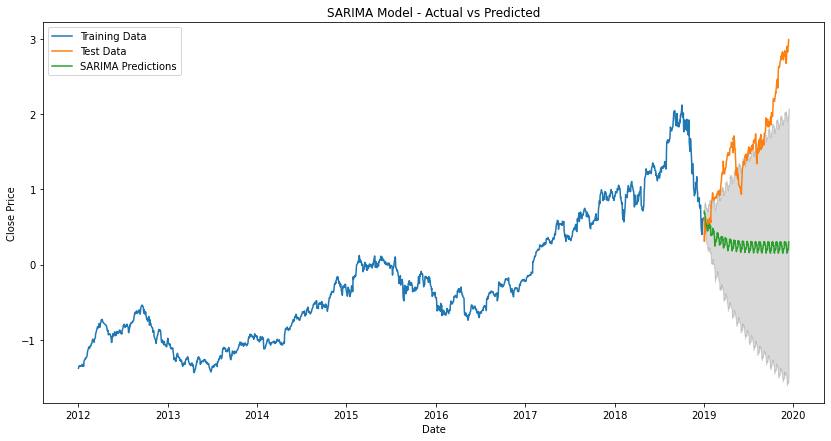

In [150]:
# Plot the actual vs predicted values for SARIMA
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(sarima_pred_df, label='SARIMA Predictions')
plt.fill_between(sarima_conf_int_df.index, sarima_conf_int_df['Lower'], sarima_conf_int_df['Upper'], color='k', alpha=.15)
plt.title('SARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### LSTM Hyperparamter Tuning

In [151]:
# Creating a Function to create the LSTM model

def create_model(units=50, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dense(25, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [152]:
# Wraping the model using the function
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn=create_model, verbose=0)

# Defining the hyperparameters grid to search
param_grid={
    'units': [50, 100, 150],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [1, 32, 64],
    'epochs': [10, 20, 30]
}

In [153]:
# Splitting data to Train and Test

# Setting the look_back period
look_back = 60

# Creating Dataset
train_size = int(len(scaled_data) * 0.80) # 80% split

train, test = scaled_data[:train_size], scaled_data[train_size:] # train is 80% and test is 20%

trainX, trainY = create_dataset(train, look_back)

testX, testY = create_dataset(test, look_back)

# Reshaping input to be [samples, time steps, feature]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [154]:
# Creating the Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2
)

# Fitting the random search model
random_search_result = random_search.fit(trainX, trainY)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END activation=tanh, batch_size=32, epochs=20, optimizer=rmsprop, units=150; total time=  13.3s
[CV] END activation=tanh, batch_size=32, epochs=20, optimizer=rmsprop, units=150; total time=  12.6s
[CV] END activation=tanh, batch_size=32, epochs=20, optimizer=rmsprop, units=150; total time=  13.6s
[CV] END activation=relu, batch_size=64, epochs=10, optimizer=adam, units=50; total time=   5.7s
[CV] END activation=relu, batch_size=64, epochs=10, optimizer=adam, units=50; total time=   5.3s
[CV] END activation=relu, batch_size=64, epochs=10, optimizer=adam, units=50; total time=   5.6s
[CV] END activation=tanh, batch_size=64, epochs=30, optimizer=rmsprop, units=100; total time=  10.4s
[CV] END activation=tanh, batch_size=64, epochs=30, optimizer=rmsprop, units=100; total time=   9.8s
[CV] END activation=tanh, batch_size=64, epochs=30, optimizer=rmsprop, units=100; total time=  10.5s
[CV] END activation=relu, batch_size=64, e

In [155]:
# Printing the best parameters and score
print(f'Best Parameters: {random_search_result.best_params_}')
print(f'Best Score: {random_search_result.best_score_}')

Best Parameters: {'units': 150, 'optimizer': 'rmsprop', 'epochs': 20, 'batch_size': 32, 'activation': 'tanh'}
Best Score: -0.00013802110818990818


### Building Model based on best parameters

In [156]:
best_model = Sequential()
best_model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
best_model.add(LSTM(units=50, return_sequences=False))
best_model.add(Dense(25, activation='tanh'))
best_model.add(Dense(1))
best_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
best_model.fit(trainX, trainY, batch_size=1, epochs=30)

Epoch 1/30
1505/1505 [==============================] - 15s 9ms/step - loss: 6.9544e-04
Epoch 2/30
1505/1505 [==============================] - 14s 9ms/step - loss: 3.1358e-04
Epoch 3/30
1505/1505 [==============================] - 13s 9ms/step - loss: 2.2130e-04
Epoch 4/30
1505/1505 [==============================] - 14s 9ms/step - loss: 1.7177e-04
Epoch 5/30
1505/1505 [==============================] - 13s 9ms/step - loss: 1.8726e-04
Epoch 6/30
1505/1505 [==============================] - 13s 9ms/step - loss: 1.6151e-04
Epoch 7/30
1505/1505 [==============================] - 13s 9ms/step - loss: 1.3597e-04
Epoch 8/30
1505/1505 [==============================] - 13s 9ms/step - loss: 1.4596e-04
Epoch 9/30
1505/1505 [==============================] - 13s 9ms/step - loss: 1.3329e-04
Epoch 10/30
1505/1505 [==============================] - 13s 9ms/step - loss: 1.5543e-04
Epoch 11/30
1505/1505 [==============================] - 13s 9ms/step - loss: 1.2937e-04
Epoch 12/30
1505/1505 [=======

In [157]:
# Splitting data to Train and Test

# Setting the look_back period
look_back = 60

# Creating Dataset
train_size = int(len(scaled_data) * 0.80) # 80% split

train, test = scaled_data[:train_size], scaled_data[train_size:] # train is 80% and test is 20%

trainX, trainY = create_dataset(train, look_back)

testX, testY = create_dataset(test, look_back)

# Reshaping input to be [samples, time steps, feature]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [158]:
# Making Predictions
trainPredict = best_model.predict(trainX)
testPredict = best_model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculating root mean squared error
trainScore = np.sqrt(np.mean(
    (trainPredict[:,0] - trainY[0]) ** 2
))

testScore = np.sqrt(np.mean(
    (testPredict[:, 0] - testY[0])**2
))

print(f'Train Score: {trainScore} RMSE')
print(f'Test Score: {testScore} RMSE')

11/11 [==============================] - 0s 4ms/step
Train Score: 1.9907533461488385 RMSE
Test Score: 9.02582863597213 RMSE


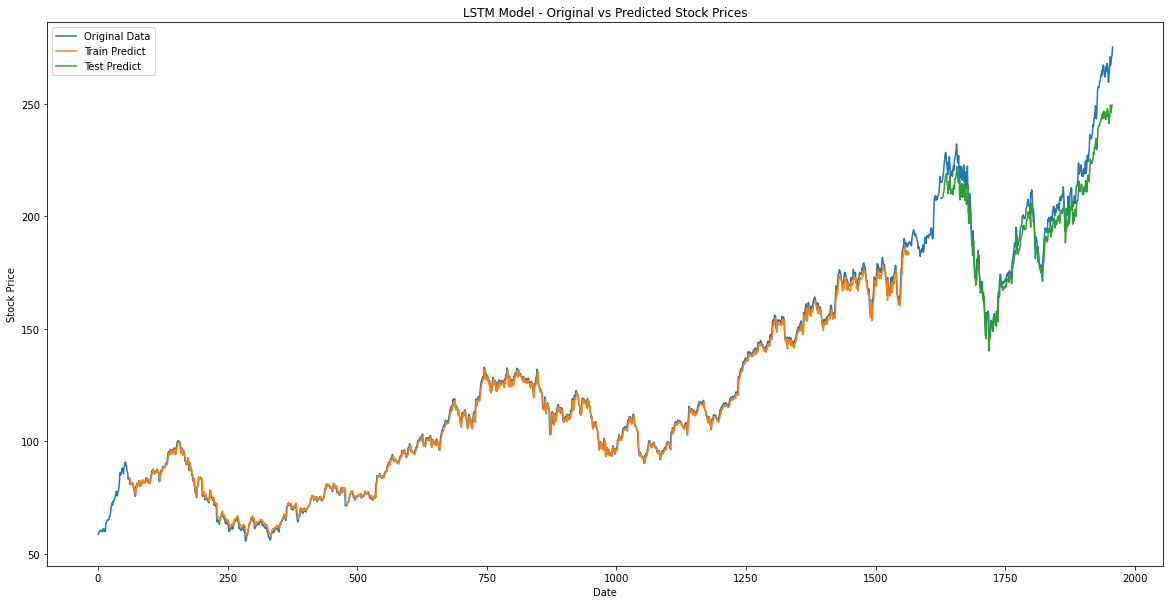

In [159]:
# Restructing shape of the array for plotting

# Shifting train predictions for plotting
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shifting test predicitons for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2) + 1 : len(scaled_data) - 1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('LSTM Model - Original vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


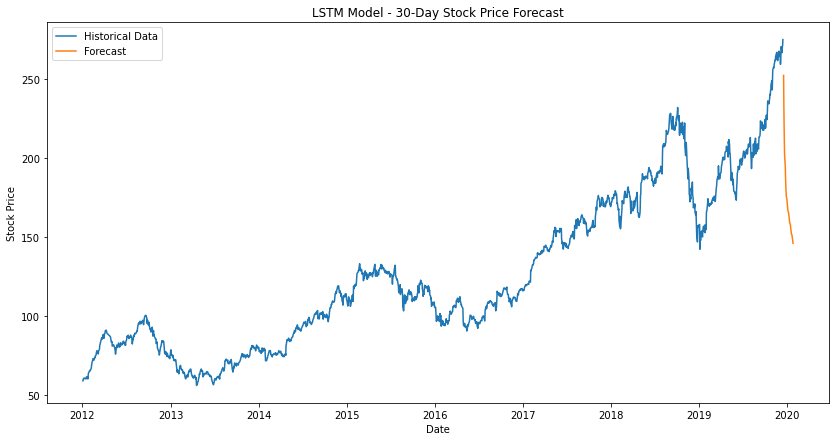

In [160]:
# Number of days to forecast
n_days = 30

# Getting the last look_back days from the dataset
last_sequence = scaled_data[-look_back:]

# Forecasting next 30 days
forecasted_values = forecast_next_days(best_model, scaled_data, n_days, look_back)

# Invertint the scaled predictions back to the original scale
forecasted_values = scaler.inverse_transform(forecasted_values.reshape(-1,1))

# Creating a Dataframe for plotting
forecast_dates = pd.date_range(
    start=dt.index[-1] + pd.Timedelta(days=1),
    periods=n_days,
    freq='B'
)

forecast_df = pd.DataFrame(
    forecasted_values,
    index=forecast_dates,
    columns=['Forecast']
)

# Plotting the results
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(dt['Close'], label='Historical Data')
plt.plot(forecast_df, label='Forecast')
plt.title('LSTM Model - 30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()